In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('carData.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
import matplotlib.pyplot as plt

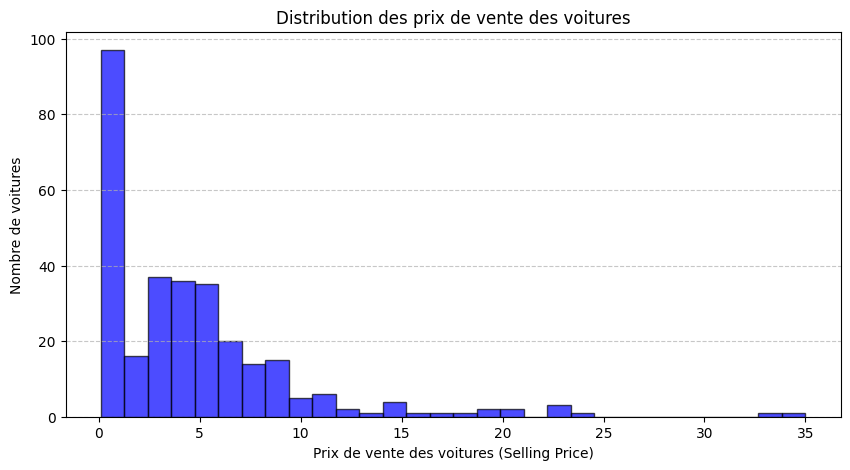

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(df["Selling_Price"], bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.xlabel("Prix de vente des voitures (Selling Price)")
plt.ylabel("Nombre de voitures")
plt.title("Distribution des prix de vente des voitures")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [10]:
import seaborn as sns

C:\Users\aubru\AppData\Local\Temp\ipykernel_15304\3337422289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="Fuel_Type", y="Selling_Price", kind="box", palette="coolwarm")


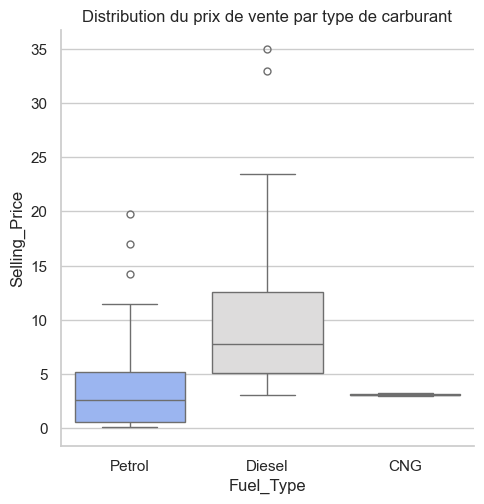

In [11]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df, x="Fuel_Type", y="Selling_Price", kind="box", palette="coolwarm")

plt.title("Distribution du prix de vente par type de carburant")
plt.show()

In [14]:
tmp = df.select_dtypes(include=['number']).corr ()
"""tmp.to_csv('data_corr.csv', index=False)"""
tmp[((tmp <= -0.3) | (tmp >= 0.3))]

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,NaN,NaN,-0.524342,NaN
Selling_Price,NaN,1.000000,0.878983,NaN,NaN
Present_Price,NaN,0.878983,1.000000,NaN,NaN
Kms_Driven,-0.524342,NaN,NaN,1.000000,NaN
Owner,NaN,NaN,NaN,NaN,1.0


In [17]:
import scipy.stats as stats

Coefficient directeur (slope): 0.5168490273953971
Ordonnée à l'origine (intercept): 0.7185274709817646
Coefficient de corrélation R²: 0.7726103146985808


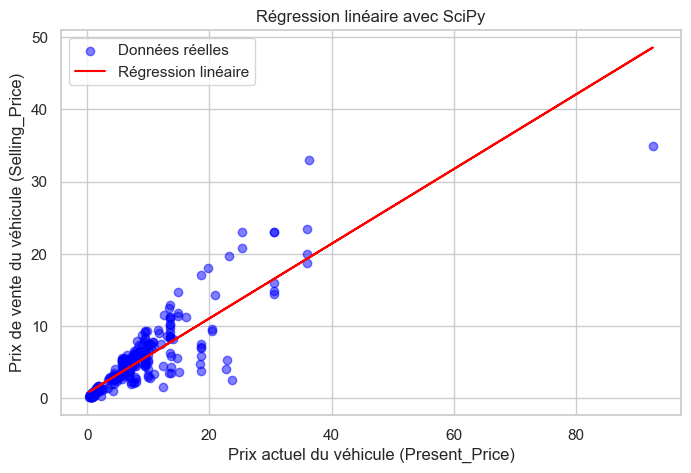

In [ ]:
X = df["Present_Price"]
Y = df["Selling_Price"]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print(f"Coefficient directeur (slope): {slope}")
print(f"Ordonnée à l'origine (intercept): {intercept}")
print(f"Coefficient de corrélation R²: {r_value**2}")

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.5, color="blue", label="Données réelles")
plt.plot(X, slope * X + intercept, color="red", label="Régression linéaire")

plt.xlabel("Prix actuel du véhicule (Present_Price)")
plt.ylabel("Prix de vente du véhicule (Selling_Price)")
plt.title("Régression linéaire avec SciPy")
plt.legend()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

Coefficient directeur (slope): 0.5168490273953965
Ordonnée à l'origine (intercept): 0.7185274709817686
Coefficient de détermination R²: 0.7726103146985799


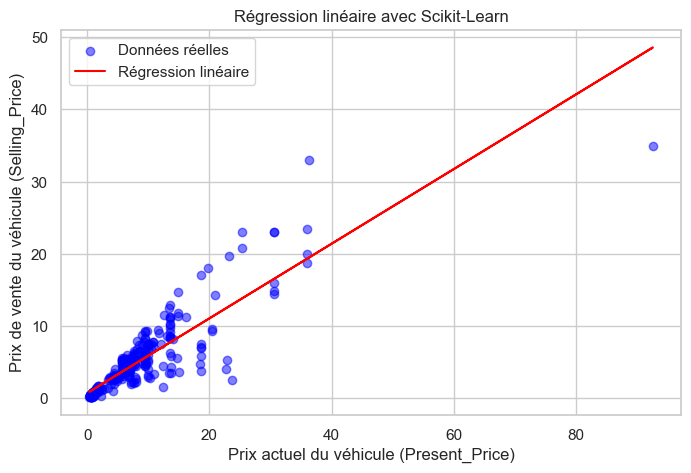

In [20]:
X_reshaped = X.values.reshape(-1, 1)
Y_reshaped = Y.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, Y_reshaped)

Y_pred = model.predict(X_reshaped)

print(f"Coefficient directeur (slope): {model.coef_[0][0]}")
print(f"Ordonnée à l'origine (intercept): {model.intercept_[0]}")
print(f"Coefficient de détermination R²: {model.score(X_reshaped, Y_reshaped)}")

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.5, color="blue", label="Données réelles")
plt.plot(X, Y_pred, color="red", label="Régression linéaire")

plt.xlabel("Prix actuel du véhicule (Present_Price)")
plt.ylabel("Prix de vente du véhicule (Selling_Price)")
plt.title("Régression linéaire avec Scikit-Learn")
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
X = df[["Present_Price", "Kms_Driven", "Transmission"]]
y = df["Selling_Price"]

X["Transmission"] = X["Transmission"].map({"Manual": 0, "Automatic": 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

C:\Users\aubru\AppData\Local\Temp\ipykernel_15304\1126694352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Transmission"] = X["Transmission"].map({"Manual": 0, "Automatic": 1})


,Present_Price,Kms_Driven,Transmission
184,0.750,26000,0
132,0.950,3500,0
194,0.787,50000,0
75,6.800,36000,0
111,1.500,8700,0


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 5.06505915e-01 -1.81310261e-05  1.47824628e+00]
Intercept: 1.3327007654666323


In [24]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 1.75
RMSE: 2.49
R²: 0.73


c:\Users\aubru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


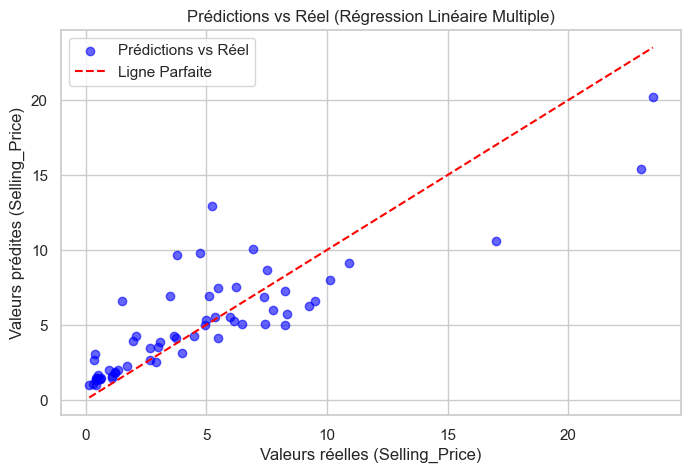

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Prédictions vs Réel")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ligne Parfaite")

plt.xlabel("Valeurs réelles (Selling_Price)")
plt.ylabel("Valeurs prédites (Selling_Price)")
plt.title("Prédictions vs Réel (Régression Linéaire Multiple)")
plt.legend()
plt.show()